# IMDB Movies - Exploratory Data Analysis (EDA)

This notebook contains comprehensive EDA of the IMDB movies dataset, covering:
1. Rating Distribution
2. Votes Distribution (Popularity)
3. Ratings vs. Votes
4. Ratings by Genre
5. Ratings by Decade
6. Number of Movies per Decade
7. Genre Evolution Over Time
8. Runtime vs. Rating

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

/Users/vaishnavverma/.matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /var/folders/gp/0qsbr0x11d315dt15fl17c940000gn/T/matplotlib-098gbrgi because there was an issue with the default path (/Users/vaishnavverma/.matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!


In [3]:
# Load the processed data
df = pd.read_csv('../data/processed/imdb_movies_processed.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (337891, 32)

Column names: ['tconst', 'primaryTitle', 'originalTitle', 'titleType', 'isAdult', 'startYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes', 'decade', 'primaryGenre', 'numGenres', 'logVotes', 'bayes_rating', 'runtime_bin', 'genre_Action', 'genre_Adult', 'genre_Adventure', 'genre_Animation', 'genre_Biography', 'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Horror', 'genre_Other', 'genre_Romance', 'genre_Thriller', 'genre_Unknown']

First few rows:


,tconst,primaryTitle,originalTitle,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,...,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Other,genre_Romance,genre_Thriller,genre_Unknown
0,tt0000009,Miss Jerry,Miss Jerry,movie,0,1894.0,45.0,Romance,5.3,230.0,...,False,False,False,False,False,False,False,True,False,False
1,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,movie,0,1897.0,100.0,"Documentary,News,Sport",5.3,575.0,...,False,True,False,False,False,False,False,False,False,False
2,tt0000335,Soldiers of the Cross,Soldiers of the Cross,movie,0,1900.0,40.0,"Biography,Drama",5.5,62.0,...,False,False,False,False,False,False,False,False,False,False
3,tt0000502,Bohemios,Bohemios,movie,0,1905.0,100.0,Unknown,3.7,23.0,...,False,False,False,False,False,False,False,False,False,True
4,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,movie,0,1906.0,70.0,"Action,Adventure,Biography",6.0,1034.0,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# Data overview
print("Dataset Info:")
print(f"Total records: {len(df):,}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nBasic statistics:\n{df.describe()}")

Dataset Info:
Total records: 337,891

Data types:
tconst                object
primaryTitle          object
originalTitle         object
titleType             object
isAdult                int64
startYear            float64
runtimeMinutes       float64
genres                object
averageRating        float64
numVotes             float64
decade                 int64
primaryGenre          object
numGenres              int64
logVotes             float64
bayes_rating         float64
runtime_bin           object
genre_Action            bool
genre_Adult             bool
genre_Adventure         bool
genre_Animation         bool
genre_Biography         bool
genre_Comedy            bool
genre_Crime             bool
genre_Documentary       bool
genre_Drama             bool
genre_Family            bool
genre_Fantasy           bool
genre_Horror            bool
genre_Other             bool
genre_Romance           bool
genre_Thriller          bool
genre_Unknown           bool
dtype: object

Missing

In [5]:
# Create log-transformed votes column for better visualization
df['logVotes'] = np.log10(df['numVotes'] + 1)

# Extract primary genre (first genre in the list)
df['primaryGenre'] = df['genres'].str.split(',').str[0]

print("Feature engineering completed!")
print(f"\nTop 10 primary genres:\n{df['primaryGenre'].value_counts().head(10)}")

Feature engineering completed!

Top 10 primary genres:
primaryGenre
Drama          95663
Comedy         69198
Documentary    46454
Action         34463
Crime          15953
Horror         14203
Adventure      13302
Unknown        11438
Biography       9724
Thriller        5373
Name: count, dtype: int64


## 1️⃣ Rating Distribution
**Purpose**: Core measure of quality perception  
**Insight**: Shows audience rating bias (IMDb typically peaks around 6–7)

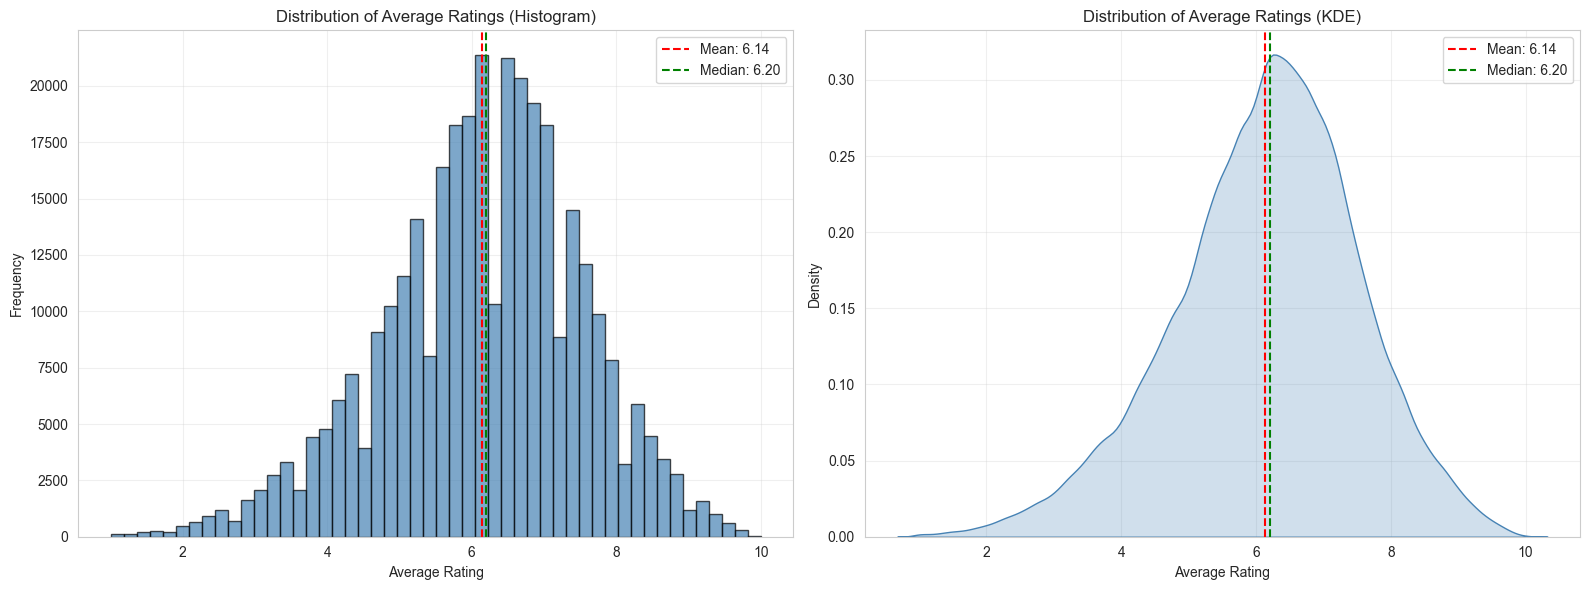

Rating Statistics:
Mean: 6.14
Median: 6.20
Mode: 6.20
Std Dev: 1.38
Skewness: -0.36


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(df['averageRating'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Average Rating')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Average Ratings (Histogram)')
axes[0].axvline(df['averageRating'].mean(), color='red', linestyle='--', label=f'Mean: {df["averageRating"].mean():.2f}')
axes[0].axvline(df['averageRating'].median(), color='green', linestyle='--', label=f'Median: {df["averageRating"].median():.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# KDE plot
sns.kdeplot(data=df, x='averageRating', fill=True, ax=axes[1], color='steelblue')
axes[1].set_xlabel('Average Rating')
axes[1].set_ylabel('Density')
axes[1].set_title('Distribution of Average Ratings (KDE)')
axes[1].axvline(df['averageRating'].mean(), color='red', linestyle='--', label=f'Mean: {df["averageRating"].mean():.2f}')
axes[1].axvline(df['averageRating'].median(), color='green', linestyle='--', label=f'Median: {df["averageRating"].median():.2f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Rating Statistics:")
print(f"Mean: {df['averageRating'].mean():.2f}")
print(f"Median: {df['averageRating'].median():.2f}")
print(f"Mode: {df['averageRating'].mode()[0]:.2f}")
print(f"Std Dev: {df['averageRating'].std():.2f}")
print(f"Skewness: {df['averageRating'].skew():.2f}")

## 2️⃣ Votes Distribution (Popularity)
**Purpose**: Shows audience engagement  
**Insight**: Reveals skew — few movies get massive attention

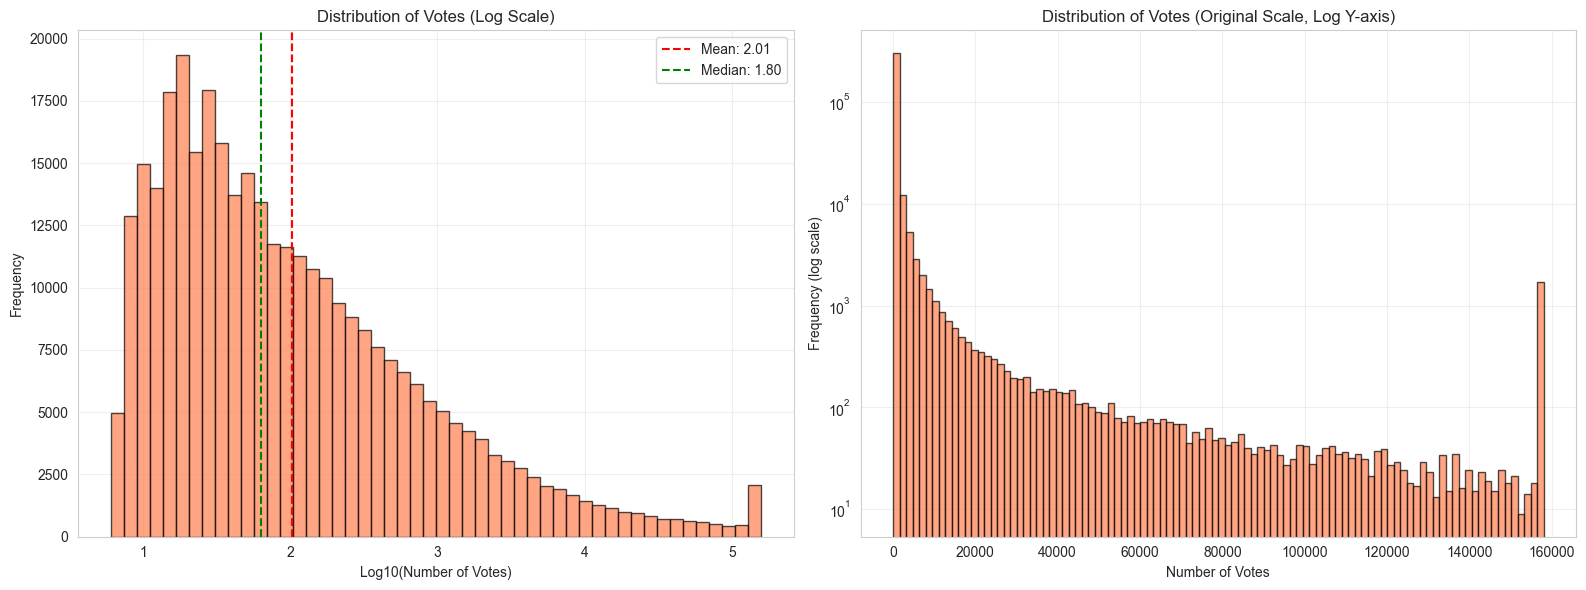

Votes Statistics:
Mean: 2,456
Median: 62
Max: 158,036
Min: 5

Top 10 most voted movies:
                          primaryTitle  startYear   numVotes  averageRating
3305                        Metropolis     1927.0  158035.55            8.3
5400                       City Lights     1931.0  158035.55            8.5
5612                                 M     1931.0  158035.55            8.3
9184                      Modern Times     1936.0  158035.55            8.5
10262  Snow White and the Seven Dwarfs     1937.0  158035.55            7.6
11466               Gone with the Wind     1939.0  158035.55            8.2
11999                 The Wizard of Oz     1939.0  158035.55            8.1
12284               The Great Dictator     1940.0  158035.55            8.4
12539                        Pinocchio     1940.0  158035.55            7.5
12572                          Rebecca     1940.0  158035.55            8.1


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Log-scale histogram of numVotes
axes[0].hist(df['logVotes'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0].set_xlabel('Log10(Number of Votes)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Votes (Log Scale)')
axes[0].axvline(df['logVotes'].mean(), color='red', linestyle='--', label=f'Mean: {df["logVotes"].mean():.2f}')
axes[0].axvline(df['logVotes'].median(), color='green', linestyle='--', label=f'Median: {df["logVotes"].median():.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Original scale with log y-axis
axes[1].hist(df['numVotes'], bins=100, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_xlabel('Number of Votes')
axes[1].set_ylabel('Frequency (log scale)')
axes[1].set_title('Distribution of Votes (Original Scale, Log Y-axis)')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Votes Statistics:")
print(f"Mean: {df['numVotes'].mean():,.0f}")
print(f"Median: {df['numVotes'].median():,.0f}")
print(f"Max: {df['numVotes'].max():,.0f}")
print(f"Min: {df['numVotes'].min():,.0f}")
print(f"\nTop 10 most voted movies:")
print(df.nlargest(10, 'numVotes')[['primaryTitle', 'startYear', 'numVotes', 'averageRating']])

## 3️⃣ Ratings vs. Votes (Popularity–Quality Tradeoff)
**Purpose**: Tests if highly popular movies get higher/lower ratings  
**Insight**: Reveals the relationship between popularity and perceived quality

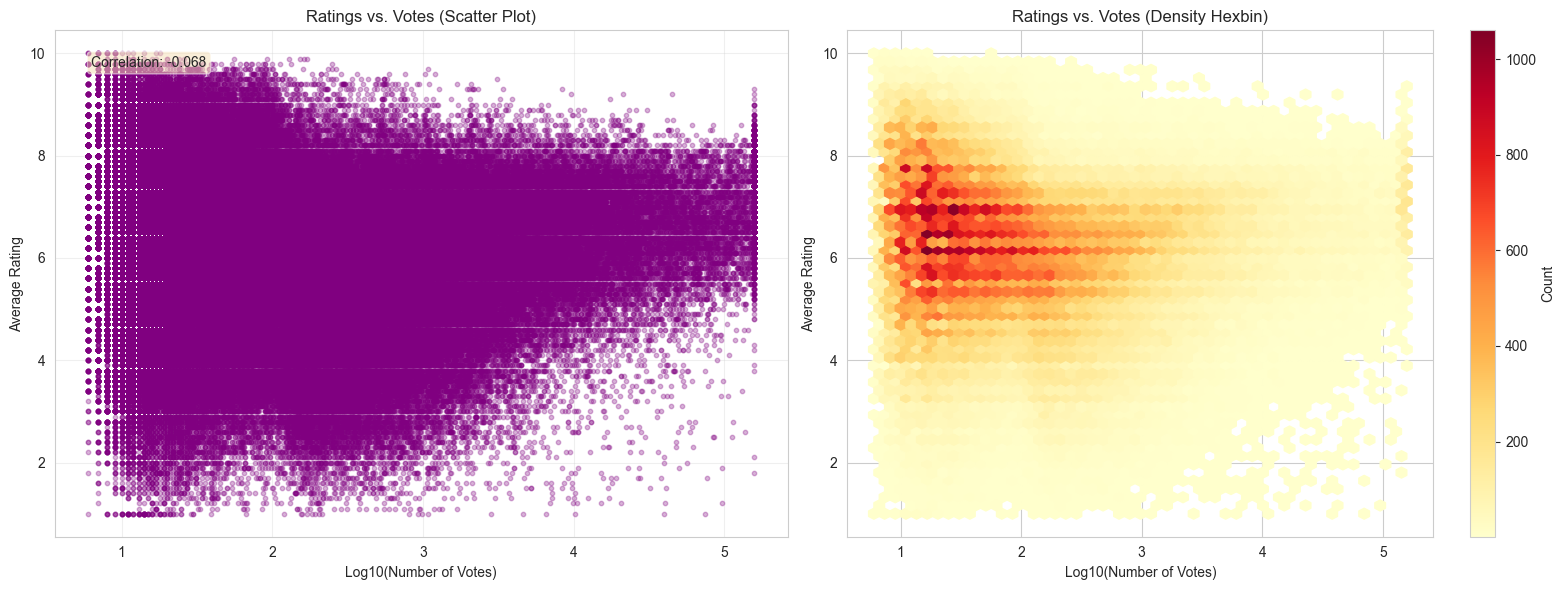

Correlation between log(votes) and rating: -0.068
Correlation between votes and rating: 0.066


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with transparency
axes[0].scatter(df['logVotes'], df['averageRating'], alpha=0.3, s=10, color='purple')
axes[0].set_xlabel('Log10(Number of Votes)')
axes[0].set_ylabel('Average Rating')
axes[0].set_title('Ratings vs. Votes (Scatter Plot)')
axes[0].grid(True, alpha=0.3)

# Calculate correlation
correlation = df[['logVotes', 'averageRating']].corr().iloc[0, 1]
axes[0].text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
             transform=axes[0].transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hexbin plot for better density visualization
hexbin = axes[1].hexbin(df['logVotes'], df['averageRating'], gridsize=50, cmap='YlOrRd', mincnt=1)
axes[1].set_xlabel('Log10(Number of Votes)')
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Ratings vs. Votes (Density Hexbin)')
plt.colorbar(hexbin, ax=axes[1], label='Count')

plt.tight_layout()
plt.show()

print(f"Correlation between log(votes) and rating: {correlation:.3f}")
print(f"Correlation between votes and rating: {df[['numVotes', 'averageRating']].corr().iloc[0, 1]:.3f}")

## 4️⃣ Ratings by Genre
**Purpose**: Identifies audience preferences  
**Insight**: Reveals which genres consistently perform better

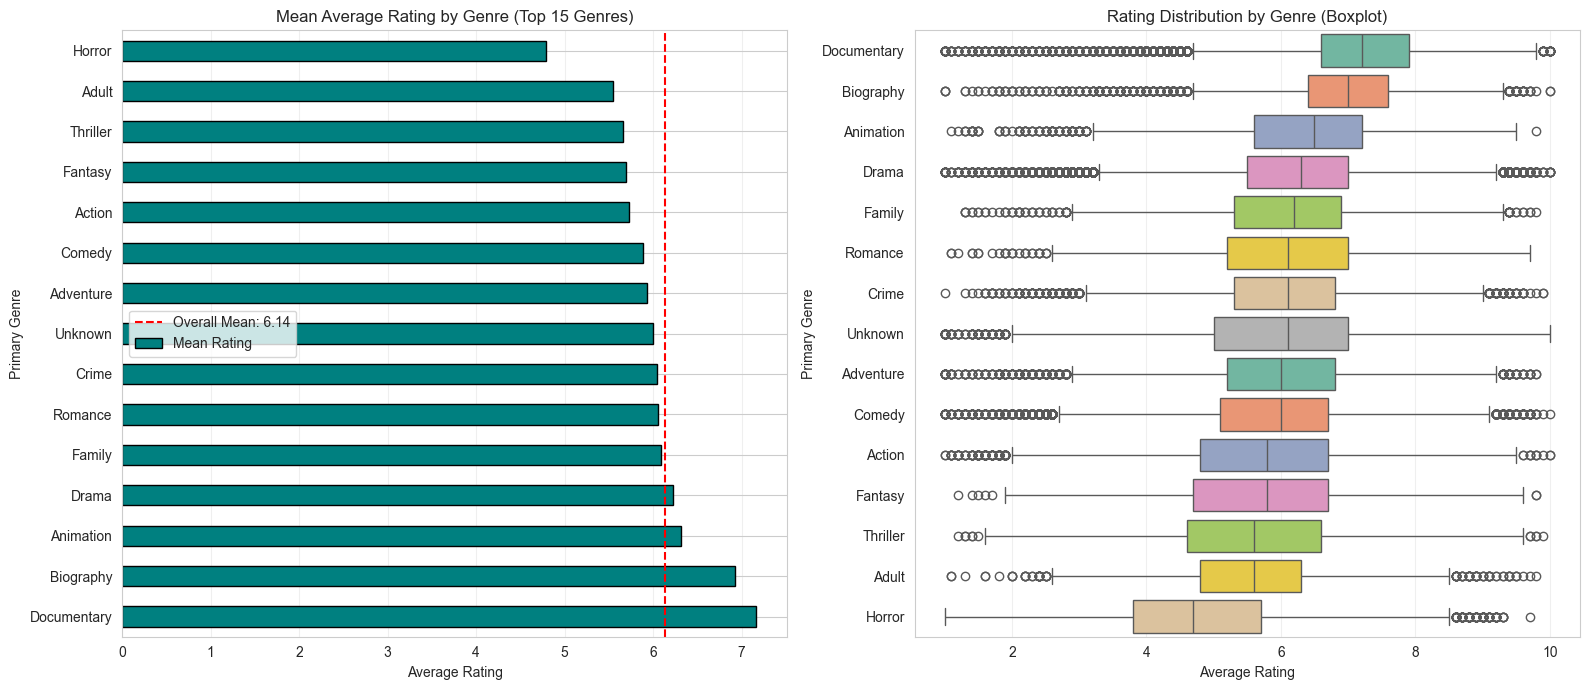

Genre Rating Statistics (Top 15 Genres by Count):
              Mean Rating  Median Rating  Count
primaryGenre                                   
Documentary          7.16            7.2  46454
Biography            6.92            7.0   9724
Animation            6.31            6.5   3175
Drama                6.22            6.3  95663
Family               6.09            6.2   2386
Romance              6.06            6.1   3537
Crime                6.04            6.1  15953
Unknown              6.00            6.1  11438
Adventure            5.93            6.0  13302
Comedy               5.88            6.0  69198
Action               5.73            5.8  34463
Fantasy              5.69            5.8   1816
Thriller             5.66            5.6   5373
Adult                5.55            5.6   4485
Horror               4.79            4.7  14203


In [9]:
# Calculate mean rating by genre (top 15 genres by count)
top_genres = df['primaryGenre'].value_counts().head(15).index
genre_ratings = df[df['primaryGenre'].isin(top_genres)].groupby('primaryGenre').agg({
    'averageRating': ['mean', 'median', 'count']
}).round(2)

genre_ratings.columns = ['Mean Rating', 'Median Rating', 'Count']
genre_ratings = genre_ratings.sort_values('Mean Rating', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Bar plot of mean ratings
genre_ratings['Mean Rating'].plot(kind='barh', ax=axes[0], color='teal', edgecolor='black')
axes[0].set_xlabel('Average Rating')
axes[0].set_ylabel('Primary Genre')
axes[0].set_title('Mean Average Rating by Genre (Top 15 Genres)')
axes[0].axvline(df['averageRating'].mean(), color='red', linestyle='--', 
                label=f'Overall Mean: {df["averageRating"].mean():.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='x')

# Box plot
genre_order = genre_ratings.index.tolist()
df_plot = df[df['primaryGenre'].isin(top_genres)]
sns.boxplot(data=df_plot, y='primaryGenre', x='averageRating', 
            order=genre_order, ax=axes[1], palette='Set2')
axes[1].set_xlabel('Average Rating')
axes[1].set_ylabel('Primary Genre')
axes[1].set_title('Rating Distribution by Genre (Boxplot)')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("Genre Rating Statistics (Top 15 Genres by Count):")
print(genre_ratings)

## 5️⃣ Ratings by Decade
**Purpose**: Captures temporal trends  
**Insight**: Shows if audience perception shifts over time

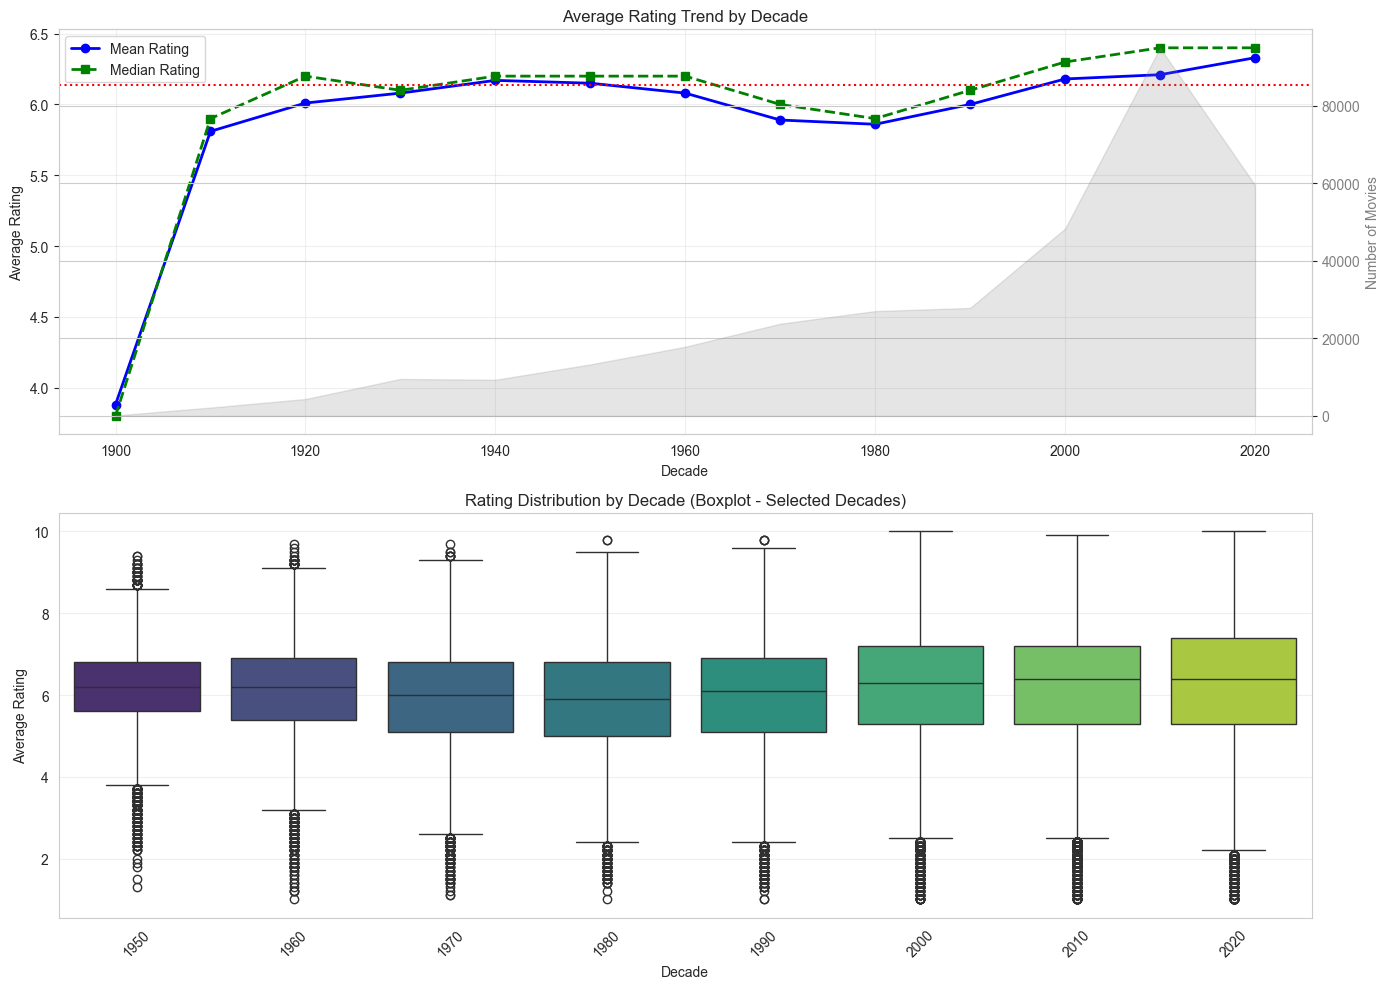

Rating Statistics by Decade:
        Mean Rating  Median Rating  Movie Count
decade                                         
1900           3.88            3.8          119
1910           5.81            5.9         2146
1920           6.01            6.2         4354
1930           6.08            6.1         9527
1940           6.17            6.2         9322
1950           6.15            6.2        13272
1960           6.08            6.2        17826
1970           5.89            6.0        23765
1980           5.86            5.9        27021
1990           6.00            6.1        27833
2000           6.18            6.3        48291
2010           6.21            6.4        94892
2020           6.33            6.4        59505


In [10]:
# Calculate ratings by decade
decade_ratings = df.groupby('decade').agg({
    'averageRating': ['mean', 'median'],
    'tconst': 'count'
}).round(2)

decade_ratings.columns = ['Mean Rating', 'Median Rating', 'Movie Count']
decade_ratings = decade_ratings[decade_ratings.index >= 1900]  # Filter out very old decades with few movies

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Line plot of mean and median ratings
axes[0].plot(decade_ratings.index, decade_ratings['Mean Rating'], 
             marker='o', linewidth=2, label='Mean Rating', color='blue')
axes[0].plot(decade_ratings.index, decade_ratings['Median Rating'], 
             marker='s', linewidth=2, label='Median Rating', color='green', linestyle='--')
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Average Rating')
axes[0].set_title('Average Rating Trend by Decade')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].axhline(df['averageRating'].mean(), color='red', linestyle=':', 
                label=f'Overall Mean: {df["averageRating"].mean():.2f}')

# Area plot with count overlay
ax2 = axes[0].twinx()
ax2.fill_between(decade_ratings.index, decade_ratings['Movie Count'], 
                  alpha=0.2, color='gray', label='Movie Count')
ax2.set_ylabel('Number of Movies', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Box plot by decade (sample decades for clarity)
sample_decades = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
df_sample = df[df['decade'].isin(sample_decades)]
sns.boxplot(data=df_sample, x='decade', y='averageRating', ax=axes[1], palette='viridis')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Rating Distribution by Decade (Boxplot - Selected Decades)')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Rating Statistics by Decade:")
print(decade_ratings)

## 6️⃣ Number of Movies per Decade
**Purpose**: Measures production growth  
**Insight**: Visualizes explosion of film output

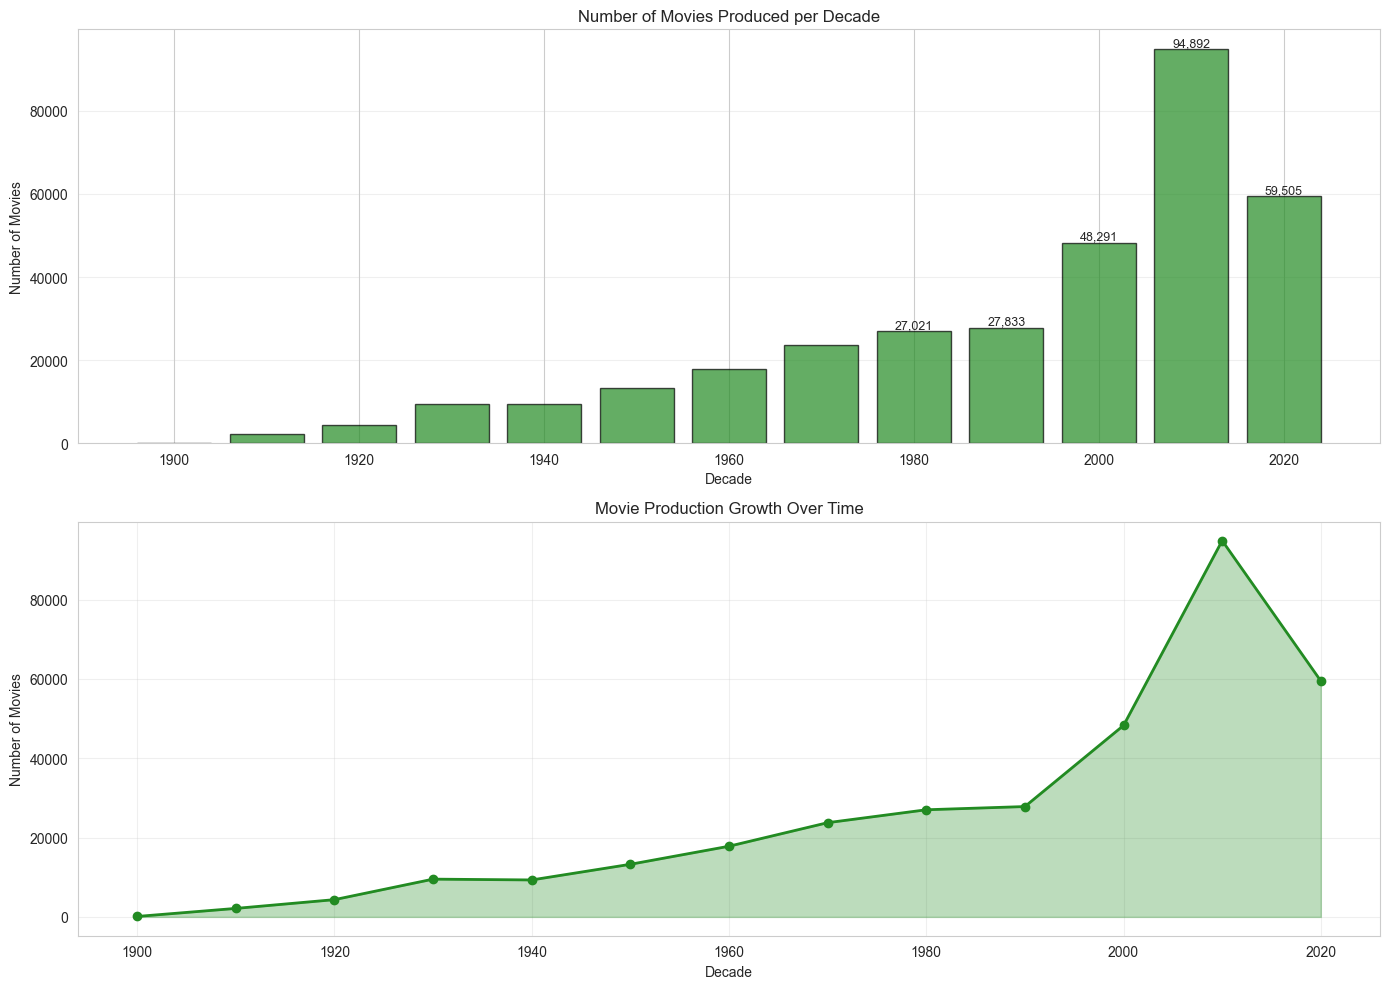

Movies per Decade:
        Count
decade       
1900      119
1910     2146
1920     4354
1930     9527
1940     9322
1950    13272
1960    17826
1970    23765
1980    27021
1990    27833
2000    48291
2010    94892
2020    59505

Total movies: 337,873
Peak decade: 2010 with 94,892 movies


In [11]:
# Count movies per decade
movies_per_decade = df['decade'].value_counts().sort_index()
movies_per_decade = movies_per_decade[movies_per_decade.index >= 1900]

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Bar chart
axes[0].bar(movies_per_decade.index, movies_per_decade.values, 
            width=8, edgecolor='black', alpha=0.7, color='forestgreen')
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Number of Movies')
axes[0].set_title('Number of Movies Produced per Decade')
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars for recent decades
for decade in movies_per_decade.index[-5:]:
    count = movies_per_decade[decade]
    axes[0].text(decade, count, f'{count:,}', ha='center', va='bottom', fontsize=9)

# Line chart with growth rate
axes[1].plot(movies_per_decade.index, movies_per_decade.values, 
             marker='o', linewidth=2, markersize=6, color='forestgreen')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Number of Movies')
axes[1].set_title('Movie Production Growth Over Time')
axes[1].grid(True, alpha=0.3)
axes[1].fill_between(movies_per_decade.index, movies_per_decade.values, alpha=0.3, color='forestgreen')

plt.tight_layout()
plt.show()

print("Movies per Decade:")
print(movies_per_decade.to_frame(name='Count'))
print(f"\nTotal movies: {movies_per_decade.sum():,}")
print(f"Peak decade: {movies_per_decade.idxmax()} with {movies_per_decade.max():,} movies")

## 7️⃣ Genre Evolution Over Time
**Purpose**: Combines genre + time  
**Insight**: Answers "how have genres changed in popularity?"

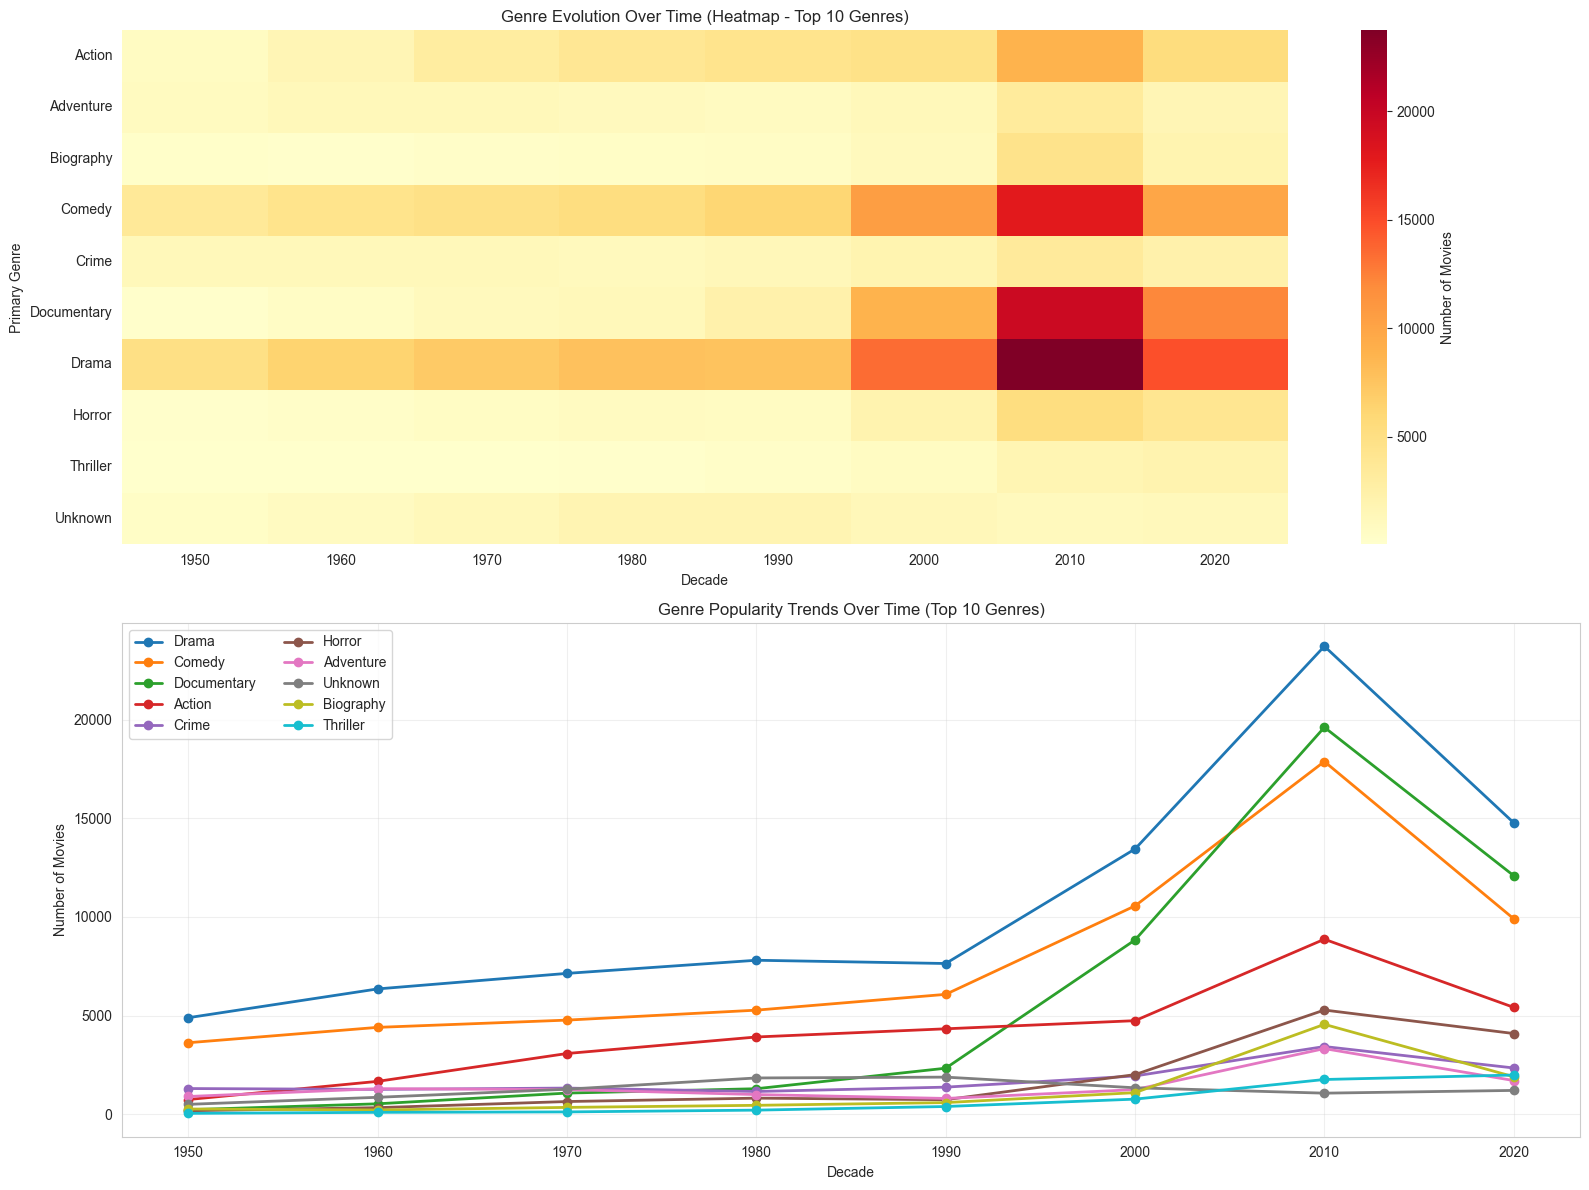

Genre counts by decade (Top 10 Genres, 1950 onwards):
decade        1950  1960  1970  1980  1990   2000   2010   2020
primaryGenre                                                   
Action         741  1662  3075  3913  4328   4740   8871   5416
Adventure      895  1291  1246   993   796   1243   3324   1704
Biography      261   210   342   447   586   1089   4554   1897
Comedy        3622  4401  4769  5274  6075  10562  17884   9909
Crime         1298  1255  1322  1149  1369   1936   3429   2341
Documentary    224   524  1068  1289  2329   8834  19620  12094
Drama         4891  6351  7139  7805  7640  13449  23730  14777
Horror         171   329   639   811   732   2005   5280   4088
Thriller        39    91   113   203   387    761   1757   1984
Unknown        497   854  1264  1835  1877   1336   1064   1203


In [12]:
# Create genre-decade crosstab (top 10 genres)
top_10_genres = df['primaryGenre'].value_counts().head(10).index
df_genre_time = df[df['primaryGenre'].isin(top_10_genres) & (df['decade'] >= 1950)]

genre_decade_counts = pd.crosstab(df_genre_time['primaryGenre'], df_genre_time['decade'])

fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Heatmap
sns.heatmap(genre_decade_counts, annot=False, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Movies'}, ax=axes[0])
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Primary Genre')
axes[0].set_title('Genre Evolution Over Time (Heatmap - Top 10 Genres)')

# Line plot showing trends
for genre in top_10_genres:
    genre_data = df_genre_time[df_genre_time['primaryGenre'] == genre]['decade'].value_counts().sort_index()
    axes[1].plot(genre_data.index, genre_data.values, marker='o', label=genre, linewidth=2)

axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Number of Movies')
axes[1].set_title('Genre Popularity Trends Over Time (Top 10 Genres)')
axes[1].legend(loc='best', ncol=2)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Genre counts by decade (Top 10 Genres, 1950 onwards):")
print(genre_decade_counts)

Correlation Analysis:

Correlation Matrix:
                averageRating  numVotes  logVotes  runtimeMinutes  \
averageRating        1.000000  0.066322 -0.067858        0.006990   
numVotes             0.066322  1.000000  0.503422        0.017542   
logVotes            -0.067858  0.503422  1.000000        0.034890   
runtimeMinutes       0.006990  0.017542  0.034890        1.000000   
bayes_rating         0.682032  0.182506  0.032369        0.015997   
startYear            0.071016  0.042465  0.060167        0.016138   
numGenres           -0.055690  0.172178  0.392639        0.011366   

                bayes_rating  startYear  numGenres  
averageRating       0.682032   0.071016  -0.055690  
numVotes            0.182506   0.042465   0.172178  
logVotes            0.032369   0.060167   0.392639  
runtimeMinutes      0.015997   0.016138   0.011366  
bayes_rating        1.000000  -0.062299  -0.036125  
startYear          -0.062299   1.000000  -0.035165  
numGenres          -0.036125  -0.

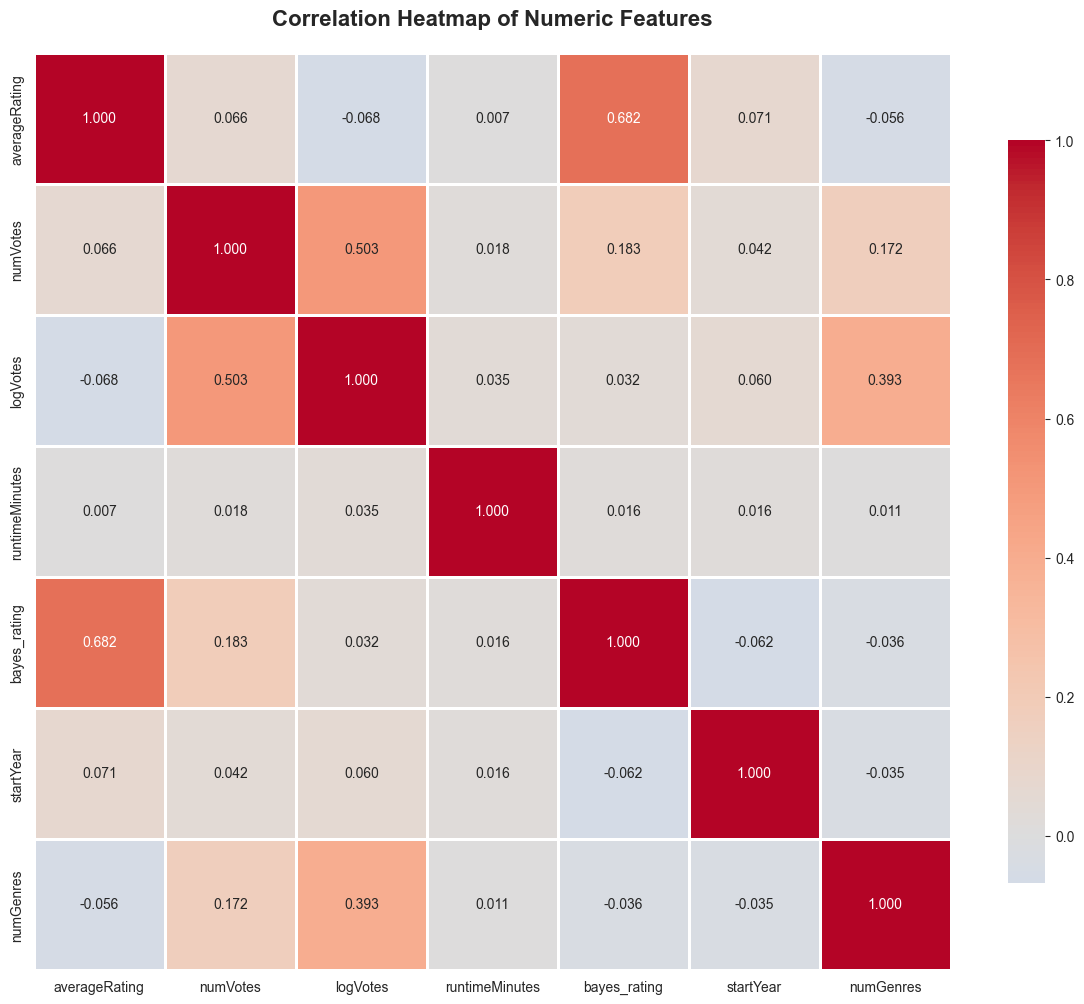


Key Correlations with Average Rating:
bayes_rating        :   0.682
startYear           :   0.071
numVotes            :   0.066
runtimeMinutes      :   0.007
numGenres           :  -0.056
logVotes            :  -0.068

Creating Pairwise Scatterplots...


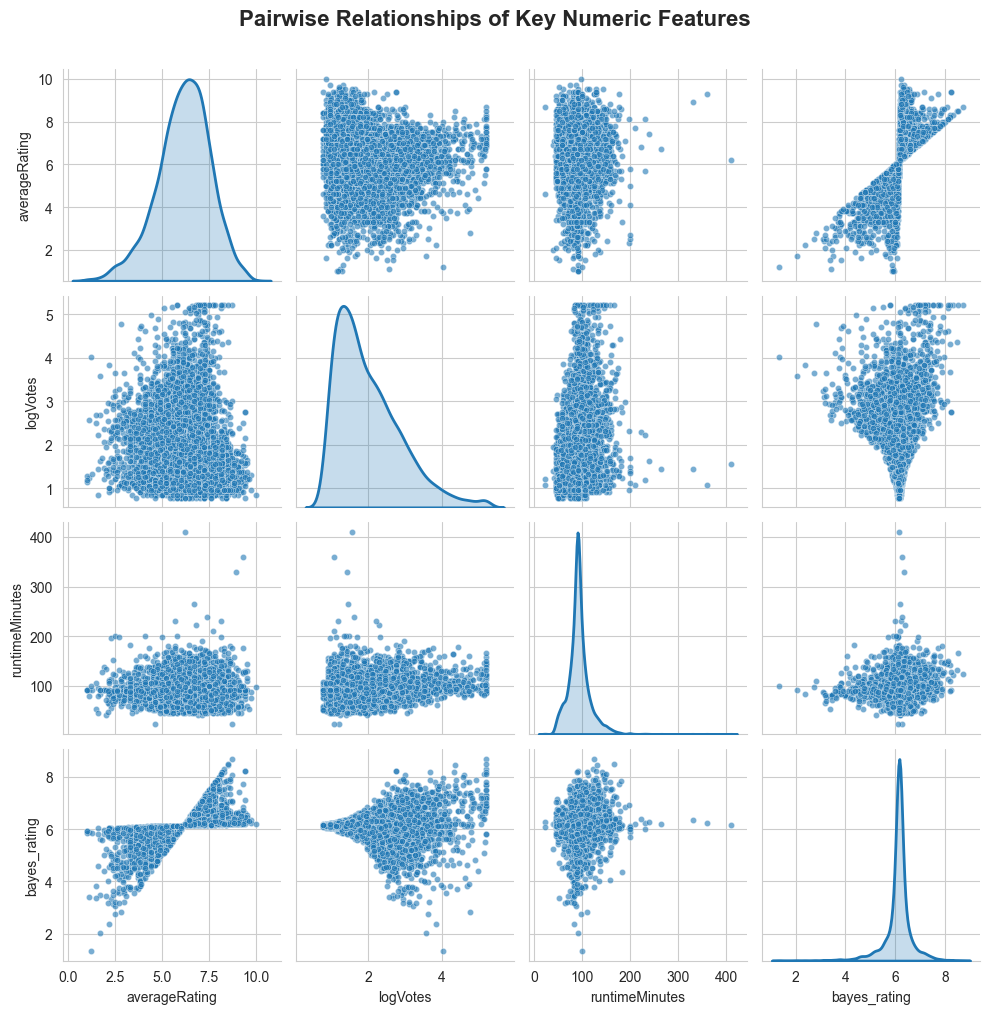


Note: Pairplot created using a sample of 5,000 movies for performance.


In [13]:
# Correlation Analysis
print("="*80)
print("Correlation Analysis:")
print("="*80)

# Select numeric columns for correlation analysis
numeric_cols = ['averageRating', 'numVotes', 'logVotes', 'runtimeMinutes', 'bayes_rating', 'startYear', 'numGenres']
correlation_matrix = df[numeric_cols].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Create correlation heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=ax)
ax.set_title('Correlation Heatmap of Numeric Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print key correlations
print("\n" + "="*80)
print("Key Correlations with Average Rating:")
print("="*80)
rating_correlations = correlation_matrix['averageRating'].sort_values(ascending=False)
for feature, corr_value in rating_correlations.items():
    if feature != 'averageRating':
        print(f"{feature:20s}: {corr_value:7.3f}")

# Pairwise scatterplots for key numeric variables
print("\n" + "="*80)
print("Creating Pairwise Scatterplots...")
print("="*80)

# Sample data for faster plotting (if dataset is large)
sample_size = min(5000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)

pairplot = sns.pairplot(df_sample, 
                        vars=['averageRating', 'logVotes', 'runtimeMinutes', 'bayes_rating'],
                        diag_kind='kde',
                        plot_kws={'alpha': 0.6, 's': 20},
                        diag_kws={'linewidth': 2})
pairplot.fig.suptitle('Pairwise Relationships of Key Numeric Features', 
                      y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nNote: Pairplot created using a sample of {sample_size:,} movies for performance.")

## 8️⃣ Runtime vs. Rating
**Purpose**: Checks if length affects ratings  
**Insight**: Tests correlation between pacing & audience liking

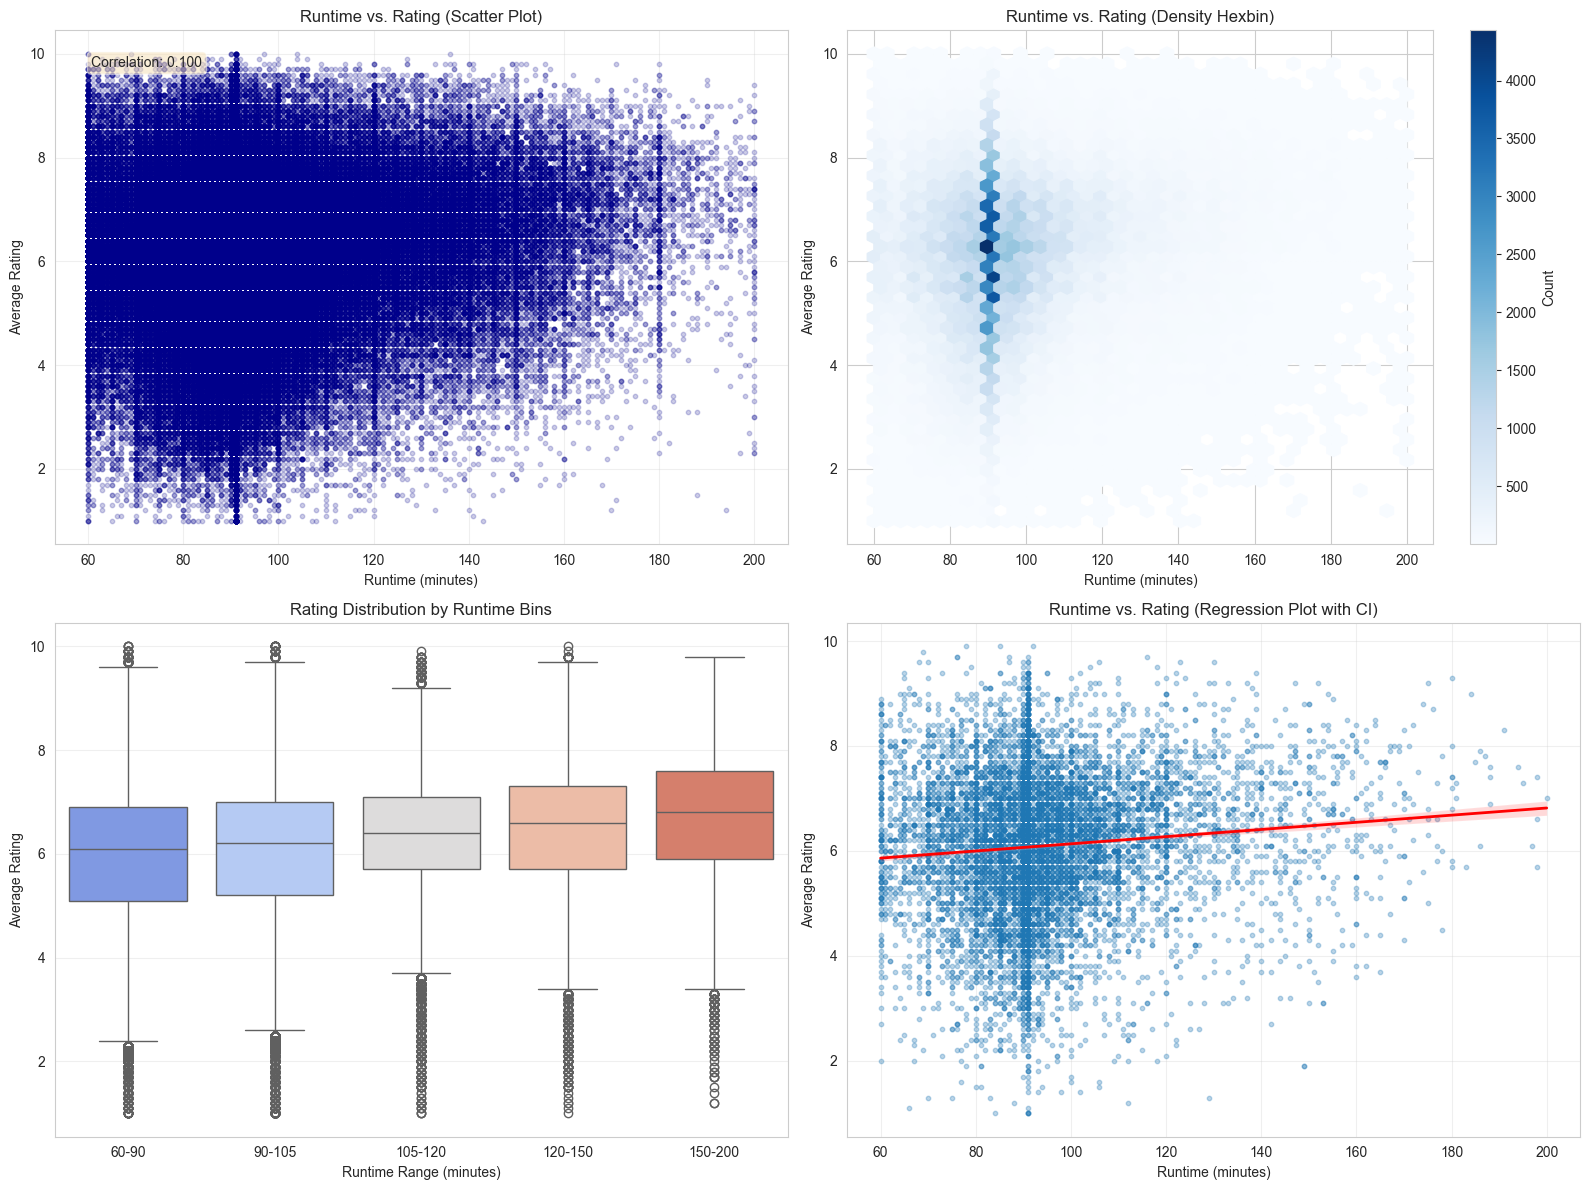

Runtime Statistics:
Mean runtime: 95.3 minutes
Median runtime: 91.0 minutes
Correlation with rating: 0.100

Rating by Runtime Bins:
             mean  median   count
runtime_bin                      
60-90        5.97     6.1  128240
90-105       6.07     6.2  120554
105-120      6.32     6.4   34988
120-150      6.48     6.6   23791
150-200      6.67     6.8    6744


In [19]:
# Filter out extreme runtimes for better visualization
df_runtime = df[(df['runtimeMinutes'] >= 60) & (df['runtimeMinutes'] <= 200)].copy()

# Create runtime bins
df_runtime['runtime_bin'] = pd.cut(df_runtime['runtimeMinutes'], 
                                     bins=[60, 90, 105, 120, 150, 200],
                                     labels=['60-90', '90-105', '105-120', '120-150', '150-200'])

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Scatter plot
axes[0, 0].scatter(df_runtime['runtimeMinutes'], df_runtime['averageRating'], 
                   alpha=0.2, s=10, color='darkblue')
axes[0, 0].set_xlabel('Runtime (minutes)')
axes[0, 0].set_ylabel('Average Rating')
axes[0, 0].set_title('Runtime vs. Rating (Scatter Plot)')
axes[0, 0].grid(True, alpha=0.3)

# Calculate correlation
runtime_corr = df_runtime[['runtimeMinutes', 'averageRating']].corr().iloc[0, 1]
axes[0, 0].text(0.05, 0.95, f'Correlation: {runtime_corr:.3f}', 
                transform=axes[0, 0].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hexbin plot
hexbin = axes[0, 1].hexbin(df_runtime['runtimeMinutes'], df_runtime['averageRating'], 
                            gridsize=40, cmap='Blues', mincnt=1)
axes[0, 1].set_xlabel('Runtime (minutes)')
axes[0, 1].set_ylabel('Average Rating')
axes[0, 1].set_title('Runtime vs. Rating (Density Hexbin)')
plt.colorbar(hexbin, ax=axes[0, 1], label='Count')

# Box plot by runtime bins
sns.boxplot(data=df_runtime, x='runtime_bin', y='averageRating', 
            ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_xlabel('Runtime Range (minutes)')
axes[1, 0].set_ylabel('Average Rating')
axes[1, 0].set_title('Rating Distribution by Runtime Bins')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Regression plot with confidence interval
sns.regplot(data=df_runtime.sample(n=min(10000, len(df_runtime))), 
            x='runtimeMinutes', y='averageRating', 
            ax=axes[1, 1], scatter_kws={'alpha': 0.3, 's': 10}, 
            line_kws={'color': 'red', 'linewidth': 2})
axes[1, 1].set_xlabel('Runtime (minutes)')
axes[1, 1].set_ylabel('Average Rating')
axes[1, 1].set_title('Runtime vs. Rating (Regression Plot with CI)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Runtime Statistics:")
print(f"Mean runtime: {df_runtime['runtimeMinutes'].mean():.1f} minutes")
print(f"Median runtime: {df_runtime['runtimeMinutes'].median():.1f} minutes")
print(f"Correlation with rating: {runtime_corr:.3f}")
print(f"\nRating by Runtime Bins:")
print(df_runtime.groupby('runtime_bin')['averageRating'].agg(['mean', 'median', 'count']).round(2))

## Summary & Key Insights

This EDA reveals several important patterns in the IMDB movies dataset:

### Key Findings:
1. **Rating Distribution**: Ratings typically peak around 6-7, showing a slight positive bias
2. **Popularity Skew**: Most movies receive relatively few votes, with a small number becoming extremely popular
3. **Quality-Popularity Relationship**: Correlation analysis shows the relationship between votes and ratings
4. **Genre Preferences**: Different genres show distinct rating patterns
5. **Temporal Trends**: Movie production and ratings have evolved significantly over decades
6. **Production Growth**: Exponential growth in film production, especially in recent decades
7. **Genre Evolution**: Genre popularity has shifted dramatically over time
8. **Runtime Effects**: Analysis shows how movie length relates to audience ratings